In [61]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [62]:
path = "../data/number/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])

for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])

        strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
        n_row = 3
        x = []
        y = []
        time_taken   = []

        for _ in range(strokes):
            if n_row < len(content)-3:
                if(content[n_row] == "Pen Down (x,y)\n"):
                    n_row =+ 1
                
                while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                    xi, yi = content[n_row].split('_')
                    yi = yi[:-1]
                    n_row += 1
                    x.append(float(xi))
                    y.append(float(yi))
                    if n_row >= len(content)-3 :
                        break

                n_row += 1

                if content[n_row][0] == "T": #If there is written "Time_taken"
                    time_taken.append(content[n_row][11:16])
                    n_row += 1
                
                if content[n_row][0] == "T": #There are double "Time_taken" 
                    n_row += 1
        
        speed = content[len(content)-2][7:12]
        

        df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
        df_number = pd.concat([df_number, df_temp])


df_number = df_number.drop(columns="time_taken") 

# Drop column time_taken beacuse is not good. It can be fixed
# But it's not so important because we have also the ratio speed that is strokes/seconds



In [63]:
# df_number.to_csv("data/number/number.csv", index=False)

In [64]:
# df_number = pd.read_csv("data/number.csv")

# train_size = int(0.7*len(df_number))
df_number_train = df_number
# df_number_test = df_number[train_size:]

In [65]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train

,label,x,y,speed,strokes
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1
0,5,"[645.0, 700.0, 763.0, 827.0, 911.0, 932.0, 980...","[58.0, 53.0, 49.0, 47.0, 50.0, 52.0, 58.0, 60....",3.199,2
0,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1
0,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1
0,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1
...,...,...,...,...,...
0,2,"[527.0, 521.0, 520.0, 519.0, 521.0, 530.0, 542...","[244.0, 243.0, 243.0, 242.0, 240.0, 235.0, 230...",1.800,2
0,2,"[376.0, 374.0, 379.0, 386.0, 397.0, 411.0, 442...","[274.0, 264.0, 256.0, 249.0, 241.0, 233.0, 223...",Infin,1
0,4,"[751.0, 733.0, 720.0, 713.0, 697.0, 678.0, 657...","[142.0, 159.0, 172.0, 179.0, 193.0, 209.0, 229...",1.400,2
0,6,"[664.0, 633.0, 622.0, 578.0, 560.0, 504.0, 467...","[215.0, 204.0, 204.0, 210.0, 214.0, 238.0, 263...",1.560,1


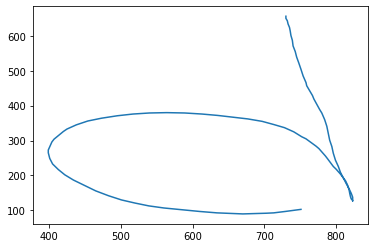

In [66]:
n = 45
# plt.plot(df_number['x'].iloc[0], df_number['y'].iloc[0])
plt.plot(df_number_train['x'].iloc[n], df_number_train['y'].iloc[n])
#plt.plot(df_number['x'].iloc[2], df_number['y'].iloc[2])
# plt.plot(df_number['x'].iloc[3], df_number['y'].iloc[3])

#Sono al contrario

In [67]:
df_number_train.iloc[n]

label                                                      9
x          [751.0, 729.0, 713.0, 703.0, 670.0, 658.0, 634...
y          [103.0, 97.0, 93.0, 92.0, 90.0, 91.0, 93.0, 97...
speed                                                  0.695
strokes                                                    1
Name: 0, dtype: object

In [68]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

# RIMUOVO QUELLI CON PIÙ DI UN STROKE PERCHÉ MI ROMPONO IL CAZZO (poi aggiustare)
df_number_train = df_number_train[df_number_train['strokes'] == 1]

# Rimuovo tutte quelle con < 11 (x,y)
df_number_train = df_number_train[df_number_train['x'].map(lambda d: len(d)) > 15]

index = pd.Series(np.arange(len(df_number_train)))
df_number_train.set_index(index, inplace=True)

In [69]:
# Calculate angle between two points in a strange mathod (BUT correct)

def calculate_arctan2_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_arctan2_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['arctan2_2'] = angles
df_number_train.head()

,label,x,y,speed,strokes,arctan2_2
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2...."
1,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0...."
2,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0..."
3,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29..."
4,8,"[676.0, 641.0, 497.0, 439.0, 415.0, 419.0, 453...","[106.0, 82.0, 106.0, 145.0, 181.0, 227.0, 262....",1.581,1,"[-2.54, 2.98, 2.55, 2.16, 1.48, 0.8, 0.43, 0.3..."


In [70]:
def calculate_arctan2(x1, y1):
    angle = np.arctan2(y1, x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])):
        angle = calculate_arctan2(number['x'][p], number['y'][p])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    angles.append(vector_of_angles)


df_number_train['arctan_1'] = angles
df_number_train.head()

,label,x,y,speed,strokes,arctan2_2,arctan_1
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2..."
1,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17..."
2,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3..."
3,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2..."
4,8,"[676.0, 641.0, 497.0, 439.0, 415.0, 419.0, 453...","[106.0, 82.0, 106.0, 145.0, 181.0, 227.0, 262....",1.581,1,"[-2.54, 2.98, 2.55, 2.16, 1.48, 0.8, 0.43, 0.3...","[0.16, 0.13, 0.21, 0.32, 0.41, 0.5, 0.52, 0.51..."


In [71]:
# df_number_train
# B è la distanza da quello prima
# C è la distanza da quello dopo
# A è la tangente del punto

angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(4,len(number['x'])-4):
        B = np.sqrt((number['x'][p] - number['x'][p+4])**2 + (number['y'][p] - number['y'][p+4])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-4])**2 + (number['y'][p] - number['y'][p-4])**2)
        A = np.sqrt((number['x'][p+4] - number['x'][p-4])**2 + (number['y'][p+4] - number['y'][p-4])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_4'] = angles
# df_number_train['angles_tangent'].iloc[10] #- df_number_train['angles'].iloc[10]
# list(set(df_number_train['angles_tangent'].iloc[10]) - set(df_number_train['angles'].iloc[10]))
# df_number_train

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_65762/1086880219.py:16: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))


In [72]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(2,len(number['x'])-2):
        B = np.sqrt((number['x'][p] - number['x'][p+2])**2 + (number['y'][p] - number['y'][p+2])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-2])**2 + (number['y'][p] - number['y'][p-2])**2)
        A = np.sqrt((number['x'][p+2] - number['x'][p-2])**2 + (number['y'][p+2] - number['y'][p-2])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_2'] = angles

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_65762/938614773.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))


In [73]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(1,len(number['x'])-1):
        B = np.sqrt((number['x'][p] - number['x'][p+1])**2 + (number['y'][p] - number['y'][p+1])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-1])**2 + (number['y'][p] - number['y'][p-1])**2)
        A = np.sqrt((number['x'][p+1] - number['x'][p-1])**2 + (number['y'][p+1] - number['y'][p-1])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_1'] = angles

/var/folders/y3/cbbh6yn577527f2swpfwv0qr0000gn/T/ipykernel_65762/3421169458.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))


In [74]:

df_number_train

,label,x,y,speed,strokes,arctan2_2,arctan_1,curvature_4,curvature_2,curvature_1
0,3,"[699.0, 733.0, 768.0, 799.0, 823.0, 840.0, 850...","[172.0, 170.0, 171.0, 175.0, 180.0, 187.0, 194...",1.684,1,"[-0.06, 0.03, 0.13, 0.21, 0.39, 0.61, 1.46, 2....","[0.24, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.2...","[2.1756, 1.3927, 1.0407, 1.0772, 1.5118, 2.339...","[2.9649, 2.9325, 2.8254, 2.4578, 1.7708, 1.772...","[3.0543, 3.0419, 3.0645, 2.9564, 2.9215, 2.292..."
1,7,"[557.0, 586.0, 617.0, 648.0, 682.0, 715.0, 748...","[146.0, 145.0, 143.0, 141.0, 140.0, 138.0, 136...",1.279,1,"[-0.03, -0.06, -0.06, -0.03, -0.06, -0.06, -0....","[0.26, 0.24, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17...","[3.1338, 3.1371, 3.1338, 3.1201, 3.1113, 3.107...","[3.1371, 3.1221, 3.1275, 3.1249, 3.1306, 3.117...","[3.1116, 3.1416, 3.1067, 3.1106, 3.1416, 3.141..."
2,8,"[497.0, 506.0, 518.0, 538.0, 582.0, 613.0, 643...","[279.0, 265.0, 254.0, 243.0, 228.0, 221.0, 218...",1.279,1,"[-1.0, -0.74, -0.5, -0.33, -0.22, -0.1, 0.0, 0...","[0.51, 0.48, 0.46, 0.42, 0.37, 0.35, 0.33, 0.3...","[2.5512, 2.4933, 2.1966, 1.8059, 1.3813, 1.294...","[2.6553, 2.8246, 2.9182, 2.9062, 2.7671, 2.585...","[2.8841, 2.9025, 2.9673, 3.0351, 3.0192, 3.042..."
3,6,"[751.0, 741.0, 731.0, 724.0, 715.0, 699.0, 686...","[95.0, 102.0, 110.0, 116.0, 123.0, 137.0, 149....",0.946,1,"[2.53, 2.47, 2.43, 2.48, 2.42, 2.4, 2.38, 2.29...","[0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.21, 0.2...","[3.0425, 3.0601, 3.0521, 3.0044, 2.9963, 2.983...","[3.1029, 3.1316, 3.093, 3.0819, 3.0872, 3.0861...","[3.0776, 3.1078, 3.094, 3.0838, 3.1151, 3.1221..."
4,8,"[676.0, 641.0, 497.0, 439.0, 415.0, 419.0, 453...","[106.0, 82.0, 106.0, 145.0, 181.0, 227.0, 262....",1.581,1,"[-2.54, 2.98, 2.55, 2.16, 1.48, 0.8, 0.43, 0.3...","[0.16, 0.13, 0.21, 0.32, 0.41, 0.5, 0.52, 0.51...","[0.9368, 1.0647, 1.7627, 2.6676, 3.0208, 2.457...","[2.4007, 2.1124, 1.873, 1.8949, 2.4127, 2.9923...","[2.3754, 2.7148, 2.7508, 2.4669, 2.4574, 2.774..."
...,...,...,...,...,...,...,...,...,...,...
868,7,"[569.0, 602.0, 642.0, 670.0, 701.0, 747.0, 776...","[147.0, 143.0, 139.0, 138.0, 138.0, 137.0, 137...",0.875,1,"[-0.12, -0.1, -0.04, 0.0, -0.02, 0.0, 0.04, 0....","[0.25, 0.23, 0.21, 0.2, 0.19, 0.18, 0.17, 0.17...","[3.0575, 3.0564, 3.0733, 3.1275, 3.0912, 3.001...","[3.0494, 3.0813, 3.1371, 3.11, 3.0684, 3.0791,...","[3.1206, 3.0776, 3.1058, 3.1197, 3.1197, 3.101..."
869,3,"[732.0, 765.0, 805.0, 832.0, 860.0, 903.0, 931...","[136.0, 127.0, 122.0, 121.0, 123.0, 130.0, 136...",1.176,1,"[-0.27, -0.12, -0.04, 0.07, 0.16, 0.21, 0.31, ...","[0.18, 0.16, 0.15, 0.14, 0.14, 0.14, 0.15, 0.1...","[2.7531, 2.7469, 2.649, 2.5127, 2.1483, 1.89, ...","[2.934, 2.9262, 2.9787, 3.006, 2.9198, 2.8299,...","[2.9997, 3.0543, 3.0333, 3.0516, 3.0918, 3.041..."
870,2,"[376.0, 374.0, 379.0, 386.0, 397.0, 411.0, 442...","[274.0, 264.0, 256.0, 249.0, 241.0, 233.0, 223...",Infin,1,"[-1.77, -1.01, -0.79, -0.63, -0.52, -0.31, -0....","[0.63, 0.61, 0.59, 0.57, 0.55, 0.52, 0.47, 0.4...","[2.413, 2.6266, 2.7525, 2.7573, 2.7794, 2.7731...","[2.4307, 2.8148, 2.8273, 2.8659, 2.9297, 2.947...","[2.3856, 2.9148, 2.985, 3.0319, 2.9345, 3.0745..."
871,6,"[664.0, 633.0, 622.0, 578.0, 560.0, 504.0, 467...","[215.0, 204.0, 204.0, 210.0, 214.0, 238.0, 263...",1.560,1,"[-2.8, 3.14, 3.01, 2.92, 2.74, 2.55, 2.37, 2.1...","[0.31, 0.31, 0.32, 0.35, 0.37, 0.44, 0.51, 0.6...","[2.4306, 2.5359, 2.3634, 2.2518, 2.0031, 1.790...","[2.7255, 2.8885, 2.8166, 2.8199, 2.7191, 2.770...","[2.8006, 3.0061, 3.0585, 2.9554, 2.9523, 2.965..."


In [75]:
# train test split

X_train, test = train_test_split(df_number_train, test_size=0.2, random_state=42)

%store test

print("shapes: ", X_train.shape, test.shape)

Stored 'test' (DataFrame)
shapes:  (698, 10) (175, 10)


In [76]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = X_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  93
len of class  1 :  40
len of class  2 :  98
len of class  3 :  98
len of class  5 :  24
len of class  6 :  100
len of class  7 :  58
len of class  8 :  105
len of class  9 :  82


In [77]:
%store df_classes

Stored 'df_classes' (dict)


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm